In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scanpy as sc
import palantir

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False)  # low dpi (dots per inch) yields small inline figures
sys.path.insert(0,'/home/users/jjzhu/source_code/aloe/src')
sys.path.insert(0,'./src')

/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning
/home/users/jjzhu/.ve/ti/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


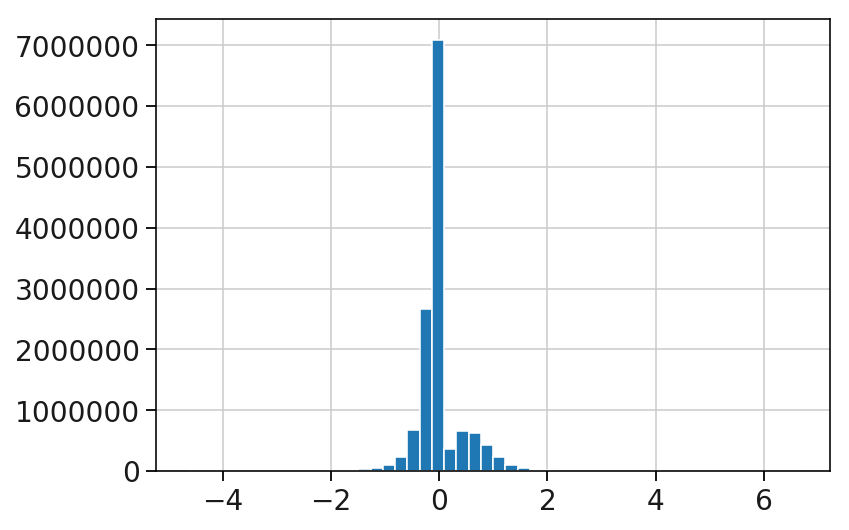

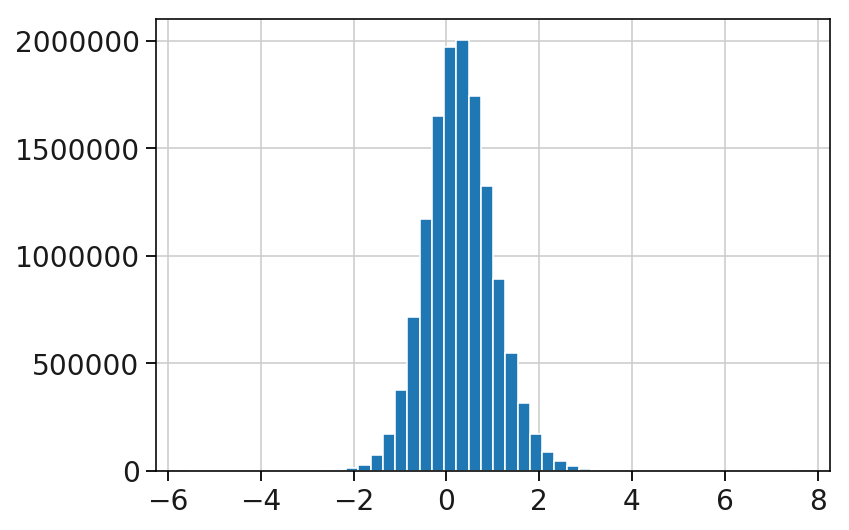

In [2]:
from intestine_info import load_processed_enterocyte_data, load_enterocyte_raw_data
from sim_utils import add_correlated_noise

dat_dir = '/share/PI/sabatti/sc_data/intestine2k'
res_dir = "/share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719"
obs_df, var_df, mtx = load_processed_enterocyte_data(res_dir)
plt.hist(mtx.flatten(), bins=50)
plt.show()

noise_struct = {"model": "normal", "block_size": 200, "corr_value": 0.3}
mtx = add_correlated_noise(mtx, noise_struct, trunc=False, scale=0.6)

norm_df = pd.DataFrame(mtx, columns=var_df['gene_ids'], index=obs_df['cell_id'])
plt.hist(norm_df.values.flatten(), bins=50)
plt.show()

In [3]:
from shared_utils import run_palantir_pseudotime
start_cell = 'AACACGTAGGGTATCG'
pr_res, out_df = run_palantir_pseudotime(norm_df, start_cell)

Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
Sampling and flocking waypoints...
Time for determining waypoints: 0.0063010414441426596 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.061646815141042074 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 1.0000
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [4]:
from scipy.stats import spearmanr
from intestine_info import load_original_entero_zonation
zone_vals = load_original_entero_zonation(just_vals=True)
abs(spearmanr(out_df['pseudotime'], zone_vals).correlation)

0.9619458234746757

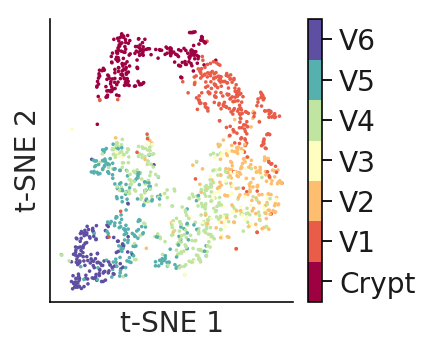

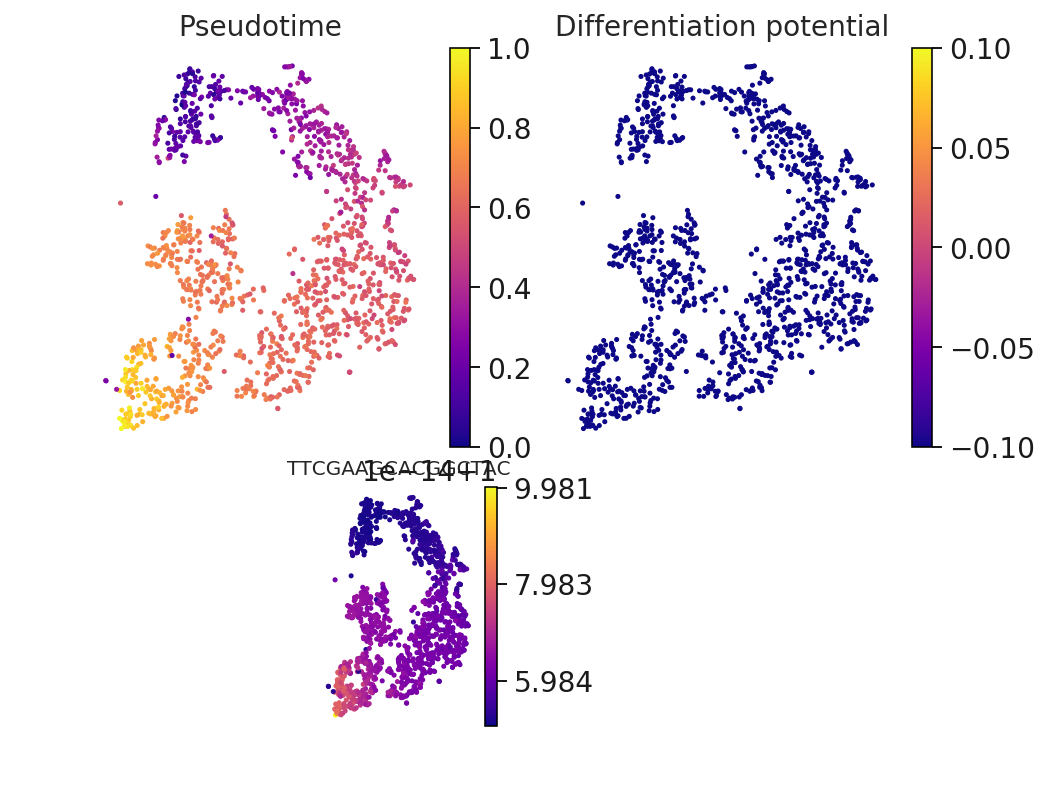

In [22]:
from intestine_info import load_enterocyte_meta_data
cell_df = load_enterocyte_meta_data()
tsne = cell_df[['tSNE_coordinate_1', 'tSNE_coordinate_2']]
tsne = tsne.rename(columns={'tSNE_coordinate_1': 'x','tSNE_coordinate_2': 'y'})
palantir.plot.plot_palantir_results(pr_res, tsne)

In [21]:
# out_dir = '/share/PI/sabatti/feat_viz/real_analysis_result/analysis_060719/entero_data'
fn = os.path.join(out_dir, 'ti_methods', 'palantir_obs_df.csv')
out_df.to_csv(fn)
print('Saved {}'.format(fn))

NameError: name 'out_dir' is not defined

In [5]:
out_df.head()

,pseudotime,entropy
cell_id,,
AAACCTGGTAAGTTCC,0.692947,0.0
AAACGGGCACCAACCG,0.845444,0.0
AAACGGGTCACTGGGC,0.373060,0.0
AAAGATGGTGGACGAT,0.650440,0.0
AAAGATGGTTCGGGCT,0.273073,0.0
